In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [2]:
merged_dir = "../../../data/merged"
image_dir = "../../../images/RF"
train_file_path = os.path.join(merged_dir, "train_smote_tomek.parquet")
train_data = pd.read_parquet(train_file_path)
test_file_path = os.path.join(merged_dir, "test_data.parquet")
test_data = pd.read_parquet(test_file_path)

In [3]:
# Prepare features and labels
X_train = train_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_train = train_data['fire'].to_numpy()

X_test = test_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_test = test_data['fire'].to_numpy()

In [4]:
import sys
from pathlib import Path

# Add the folders where the .py files live
sys.path.append(str(Path('../../../code/myModels').resolve()))
sys.path.append(str(Path('../../../code/Metrics').resolve()))

# Now import
from RandomForest import MyRandomForest
from classification import ClassificationMetrics


In [5]:
# free up memory

import gc
gc.collect()

0

In [6]:
rf = MyRandomForest(n_estimators=20, max_depth=15, random_state=42, verbose=True)
rf.fit(X_train, y_train)


Fitting tree 1/20: features [23 40 50 29  6 41 26]

Fitting tree 2/20: features [17  0 45 51 19 20 22]

Fitting tree 3/20: features [34 18 49 10  0 15 47]

Fitting tree 4/20: features [12 50 40 24 33 52 53]

Fitting tree 5/20: features [10 47 40 14 50 33  7]

Fitting tree 6/20: features [53 13 52 44 45  6 46]

Fitting tree 7/20: features [49 17 54 35  5  3 46]

Fitting tree 8/20: features [37 51  6 31 22 38 33]

Fitting tree 9/20: features [ 2 21  5  7 20 23 49]

Fitting tree 10/20: features [48 49 22 36 31 26  5]

Fitting tree 11/20: features [ 7 39 37 25  3 16 46]

Fitting tree 12/20: features [56 26 44 41 18 33 55]

Fitting tree 13/20: features [34 45 57 47 49  4 18]

Fitting tree 14/20: features [27 42 13 47 22 30 52]

Fitting tree 15/20: features [15 28  8 18 19 46 37]

Fitting tree 16/20: features [44 53 35 54 16 28 14]

Fitting tree 17/20: features [20 52 53  1 50 41 46]

Fitting tree 18/20: features [23 13 49 19 32 20 47]

Fitting tree 19/20: features [33 25 37 36 52 30 49]

F

In [7]:
print("✅ Evaluating on test data...")

✅ Evaluating on test data...


In [8]:
y_pred = rf.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

y_true = y_test

# 1️⃣ Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = np.unique(np.concatenate([y_true, y_pred]))

# Pretty-print confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=labels, columns=labels))

# 2️⃣ Classification report (precision, recall, f1-score)
report = classification_report(y_true, y_pred, digits=3)
print("\nClassification Report:")
print(report)



Confusion Matrix:
      0    1
0  7027  549
1   161  722

Classification Report:
              precision    recall  f1-score   support

           0      0.978     0.928     0.952      7576
           1      0.568     0.818     0.670       883

    accuracy                          0.916      8459
   macro avg      0.773     0.873     0.811      8459
weighted avg      0.935     0.916     0.923      8459




Top Feature Importances:
  prec_iqr_autumn → 0.0590
  prec_iqr_summer → 0.0569
  tmin_median_winter → 0.0546
  tmax_iqr_summer → 0.0525
  prec_median_summer → 0.0505
  prec_iqr_winter → 0.0491
  tmax_median_spring → 0.0428
  TOTAL_N → 0.0418
  prec_median_winter → 0.0411
  PH_WATER → 0.0303


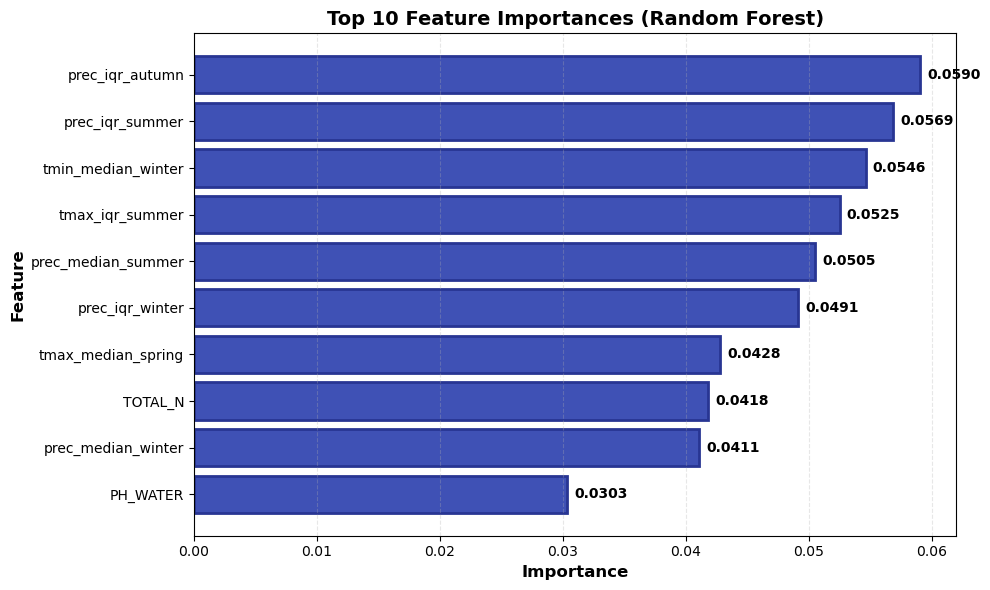

In [10]:
feature_names = test_data.drop(columns=['fire', 'longitude', 'latitude']).columns.tolist()
rf.plot_feature_importances(feature_names=feature_names)

In [11]:
# save predictions, y_pred with their true labels and the model
import pickle
output_dir = "../../models/random_forest_smote_tomek"
os.makedirs(output_dir, exist_ok=True)
with open(os.path.join(output_dir, "y_test_RFST.pkl"), "wb") as f:
    pickle.dump(y_test, f)
with open(os.path.join(output_dir, "y_pred_RFST.pkl"), "wb") as f:
    pickle.dump(y_pred, f)
with open(os.path.join(output_dir, "random_forest_RFST_model.pkl"), "wb") as f:
    pickle.dump(rf, f)